In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud ,STOPWORDS
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from nltk.tokenize import word_tokenize 

import re
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("/content/drive/MyDrive/BBC News Train.csv")

In [3]:
data

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment
1487,1590,weak dollar hits reuters revenues at media gro...,business
1488,1587,apple ipod family expands market apple has exp...,tech


In [4]:
data.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [5]:
### Understanding Features and Target Variables

In [6]:
data['Category'].unique()

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

In [7]:
data.shape

(1490, 3)

In [8]:
data.dtypes

ArticleId     int64
Text         object
Category     object
dtype: object

In [9]:
# Checking Null Values

In [10]:
data.isnull().any()

ArticleId    False
Text         False
Category     False
dtype: bool

In [11]:
# CountPlot of Target Variable (Category)

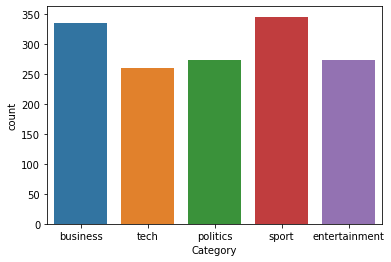

In [12]:
sns.countplot(data.Category)

In [13]:
data['News_length'] = data['Text'].str.len()
print(data['News_length'])

0       1866
1       2016
2       3104
3       3618
4       2190
        ... 
1485    1266
1486    3111
1487    1370
1488    3242
1489    1723
Name: News_length, Length: 1490, dtype: int64


In [14]:
#Distribution Plot

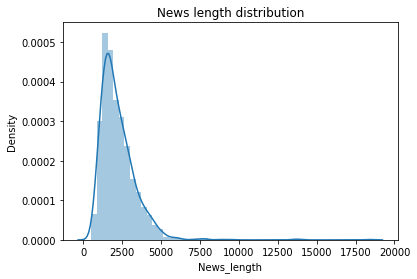

In [15]:
sns.distplot(data['News_length']).set_title('News length distribution');

In [16]:
#Word Cloud

In [17]:
def create_wordcloud(words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

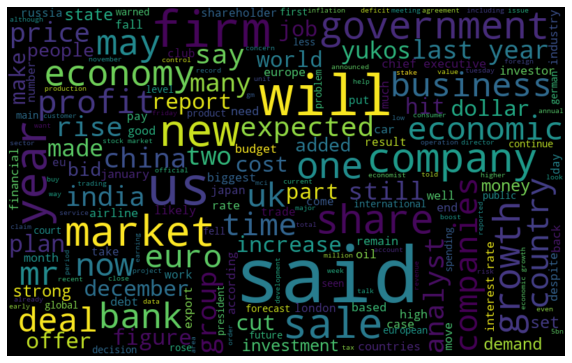

In [18]:
subset=data[data.Category=="business"]
text=subset.Text.values
words =" ".join(text)
create_wordcloud(words)

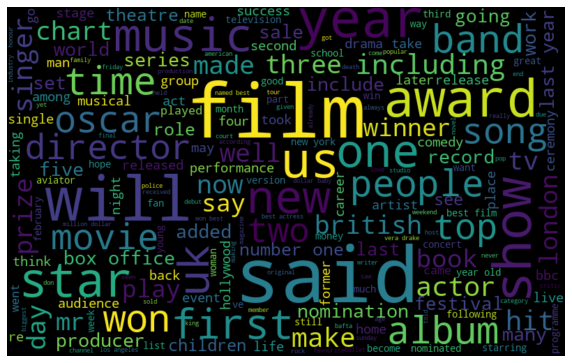

In [19]:
subset=data[data.Category=="entertainment"]
text=subset.Text.values
words =" ".join(text)
create_wordcloud(words)

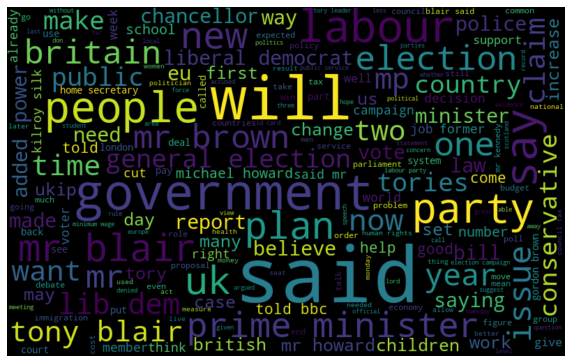

In [20]:
subset=data[data.Category=="politics"]
text=subset.Text.values
words =" ".join(text)
create_wordcloud(words)

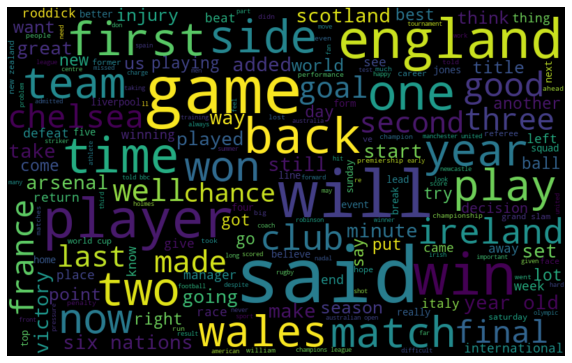

In [21]:
subset=data[data.Category=="sport"]
text=subset.Text.values
words =" ".join(text)
create_wordcloud(words)

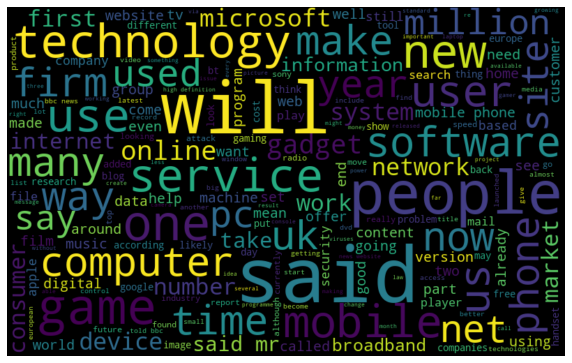

In [22]:
subset=data[data.Category=="tech"]
text=subset.Text.values
words =" ".join(text)
create_wordcloud(words)

In [23]:
# Feature Engoneering


#Removing the special characters
#1) \r
#2) \n

#Removing Punctuations and Stopwords

In [24]:
def process_text(text):
    text = text.lower().replace('\n',' ').replace('\r','').strip()
    text = re.sub(' +', ' ', text)
    text = re.sub(r'[^\w\s]','',text)
    
    
    stop_words = set(stopwords.words('english')) 
    word_tokens = word_tokenize(text) 
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
    filtered_sentence = [] 
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
    
    text = " ".join(filtered_sentence)
    return text

In [25]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [26]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [27]:
data['Text_parsed'] = data['Text'].apply(process_text)

In [28]:
data.head()

,ArticleId,Text,Category,News_length,Text_parsed
0,1833,worldcom ex-boss launches defence lawyers defe...,business,1866,worldcom exboss launches defence lawyers defen...
1,154,german business confidence slides german busin...,business,2016,german business confidence slides german busin...
2,1101,bbc poll indicates economic gloom citizens in ...,business,3104,bbc poll indicates economic gloom citizens maj...
3,1976,lifestyle governs mobile choice faster bett...,tech,3618,lifestyle governs mobile choice faster better ...
4,917,enron bosses in $168m payout eighteen former e...,business,2190,enron bosses 168m payout eighteen former enron...


In [29]:
#Label Encoding

In [30]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
data['Category_target']= label_encoder.fit_transform(data['Category'])

In [31]:
data.head()

,ArticleId,Text,Category,News_length,Text_parsed,Category_target
0,1833,worldcom ex-boss launches defence lawyers defe...,business,1866,worldcom exboss launches defence lawyers defen...,0
1,154,german business confidence slides german busin...,business,2016,german business confidence slides german busin...,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,3104,bbc poll indicates economic gloom citizens maj...,0
3,1976,lifestyle governs mobile choice faster bett...,tech,3618,lifestyle governs mobile choice faster better ...,4
4,917,enron bosses in $168m payout eighteen former e...,business,2190,enron bosses 168m payout eighteen former enron...,0


In [32]:
data.to_csv('News_processed.csv')

In [33]:
#Split the data in Training and testing

In [34]:
X_train, X_test, y_train, y_test = train_test_split(data['Text_parsed'], 
                                                    data['Category_target'], 
                                                    test_size=0.2, 
                                                    random_state=8)

In [35]:
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300

In [36]:
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)
                        
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)

[[0.0894863  0.         0.         ... 0.         0.0463896  0.06766975]
 [0.05501963 0.         0.07169191 ... 0.03972773 0.08176571 0.07044504]
 [0.         0.         0.         ... 0.11423937 0.13886684 0.        ]
 ...
 [0.13256211 0.         0.17273162 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.04393444 0.         0.        ]]
(298, 300)


In [37]:
# Building Models

In [38]:
# RandomForest

In [39]:
from sklearn.ensemble import RandomForestClassifier
model  = RandomForestClassifier(random_state=1)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.9194630872483222
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        76
           1       0.94      0.94      0.94        47
           2       0.89      0.85      0.87        55
           3       0.96      0.98      0.97        65
           4       0.88      0.96      0.92        55

    accuracy                           0.92       298
   macro avg       0.92      0.92      0.92       298
weighted avg       0.92      0.92      0.92       298



In [40]:
from sklearn.linear_model import LogisticRegression
model  = LogisticRegression()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.9429530201342282
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        76
           1       0.98      0.98      0.98        47
           2       0.96      0.87      0.91        55
           3       0.96      0.98      0.97        65
           4       0.91      0.96      0.94        55

    accuracy                           0.94       298
   macro avg       0.95      0.94      0.94       298
weighted avg       0.94      0.94      0.94       298



In [41]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.912751677852349
              precision    recall  f1-score   support

           0       0.92      0.87      0.89        76
           1       1.00      0.89      0.94        47
           2       0.84      0.89      0.87        55
           3       0.98      0.95      0.97        65
           4       0.84      0.96      0.90        55

    accuracy                           0.91       298
   macro avg       0.92      0.91      0.91       298
weighted avg       0.92      0.91      0.91       298



In [42]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.7818791946308725
              precision    recall  f1-score   support

           0       0.70      0.71      0.71        76
           1       0.84      0.91      0.88        47
           2       0.72      0.62      0.67        55
           3       0.81      0.92      0.86        65
           4       0.86      0.76      0.81        55

    accuracy                           0.78       298
   macro avg       0.79      0.79      0.78       298
weighted avg       0.78      0.78      0.78       298



In [43]:
from sklearn.naive_bayes import GaussianNB
model = DecisionTreeClassifier()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.7986577181208053
              precision    recall  f1-score   support

           0       0.72      0.76      0.74        76
           1       0.86      0.89      0.88        47
           2       0.77      0.65      0.71        55
           3       0.85      0.92      0.88        65
           4       0.82      0.76      0.79        55

    accuracy                           0.80       298
   macro avg       0.80      0.80      0.80       298
weighted avg       0.80      0.80      0.80       298



In [44]:
from sklearn.model_selection import GridSearchCV
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

hyperF

{'max_depth': [5, 8, 15, 25, 30],
 'min_samples_leaf': [1, 2, 5, 10],
 'min_samples_split': [2, 5, 10, 15, 100],
 'n_estimators': [100, 300, 500, 800, 1200]}

In [45]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [46]:
model = RandomForestClassifier()
gridF = GridSearchCV(model,hyperF,cv=3,verbose=1,n_jobs = -1 )
bestF = gridF.fit(features_train,labels_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   54.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 17.0min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 28.0min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 34.3min finished


In [47]:
bestF.best_params_

{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 800}

In [48]:
from sklearn.ensemble import RandomForestClassifier
model1  = RandomForestClassifier(random_state=1,max_depth= 30, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100)
model1.fit(features_train, labels_train)
model_predictions = model1.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.9295302013422819
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        76
           1       0.94      0.94      0.94        47
           2       0.91      0.87      0.89        55
           3       0.95      0.97      0.96        65
           4       0.90      0.96      0.93        55

    accuracy                           0.93       298
   macro avg       0.93      0.93      0.93       298
weighted avg       0.93      0.93      0.93       298



In [49]:
param_grid = {'C': [0.1,0.001,1],
    # Create a list of options for the regularization penalty
    'penalty' : ['l1', 'l2'] }
model = LogisticRegression()
clf = GridSearchCV(model, param_grid, cv = 3, verbose = 1)

bestF = clf.fit(features_train, labels_train)
bestF.best_params_

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.6s finished


{'C': 1, 'penalty': 'l2'}

In [50]:
bestF.best_params_

{'C': 1, 'penalty': 'l2'}

In [51]:
model = LogisticRegression(C=1)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.9429530201342282
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        76
           1       0.98      0.98      0.98        47
           2       0.96      0.87      0.91        55
           3       0.96      0.98      0.97        65
           4       0.91      0.96      0.94        55

    accuracy                           0.94       298
   macro avg       0.95      0.94      0.94       298
weighted avg       0.94      0.94      0.94       298



In [52]:
from sklearn.model_selection import GridSearchCV
params_KNN = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7], 
              'p': [1, 2, 5]}
model = KNeighborsClassifier()


gridF = GridSearchCV(model, params_KNN, cv = 5, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(features_train, labels_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   27.3s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:  1.1min finished


In [53]:
bestF.best_params_

{'n_neighbors': 7, 'p': 2}

In [54]:
model = KNeighborsClassifier(n_neighbors=7,p=2)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.9161073825503355
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        76
           1       1.00      0.89      0.94        47
           2       0.88      0.91      0.89        55
           3       0.97      0.95      0.96        65
           4       0.83      0.96      0.89        55

    accuracy                           0.92       298
   macro avg       0.92      0.92      0.92       298
weighted avg       0.92      0.92      0.92       298



In [55]:
import numpy as np
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

min_samples_leaf = randint(1,9)

criterion = ['gini', 'entropy']
max_depth = [3,None]



hyperF = dict(max_depth=max_depth,
                      criterion=criterion,
                      min_samples_leaf=min_samples_leaf)

model  = DecisionTreeClassifier(random_state=1)
gridF = RandomizedSearchCV(model, hyperF, cv = 3, verbose = 1)
bestF = gridF.fit(features_train, labels_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.5s finished


In [56]:
bestF.best_params_

{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1}

In [57]:
model = DecisionTreeClassifier(random_state=1,criterion= 'entropy', max_depth= None,min_samples_leaf=6)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.7416107382550335
              precision    recall  f1-score   support

           0       0.67      0.66      0.66        76
           1       0.70      0.85      0.77        47
           2       0.73      0.69      0.71        55
           3       0.84      0.78      0.81        65
           4       0.79      0.76      0.78        55

    accuracy                           0.74       298
   macro avg       0.75      0.75      0.75       298
weighted avg       0.74      0.74      0.74       298



In [58]:
News = pd.read_csv('News_processed.csv')

In [61]:
News.columns

Index(['Unnamed: 0', 'ArticleId', 'Text', 'Category', 'News_length',
       'Text_parsed', 'Category_target'],
      dtype='object')

In [62]:
New_news_data = pd.DataFrame()

In [63]:
New_news_data['Text'] = News['Text_parsed']

In [67]:
New_news_data['Category'] = News['Category']

In [68]:
New_news_data.head()

,Text,Category
0,worldcom exboss launches defence lawyers defen...,business
1,german business confidence slides german busin...,business
2,bbc poll indicates economic gloom citizens maj...,business
3,lifestyle governs mobile choice faster better ...,tech
4,enron bosses 168m payout eighteen former enron...,business


In [69]:
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument

In [77]:
def label_sentences(corpus, label_type):
    labeled = []
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(TaggedDocument(v.split(), [label]))
    
    return labeled


X_train, X_test, y_train, y_test = train_test_split(data.Text, data.Category, random_state=0, test_size=0.3)


In [78]:
X_train.shape

(1043,)

In [79]:
X_test.shape

(447,)

In [80]:
X_train[:5]

240     solskjaer raises hopes of return manchester un...
1305    microsoft releases bumper patches microsoft ha...
1042    ferguson rues failure to cut gap boss sir alex...
1426    galloway plea for hostage release ex-labour mp...
1364    mcconnell in  drunk  remark row scotland s fir...
Name: Text, dtype: object

In [81]:
X_train = label_sentences(X_train,'Train')

In [82]:
X_train[0]

TaggedDocument(words=['solskjaer', 'raises', 'hopes', 'of', 'return', 'manchester', 'united', 'striker', 'ole', 'gunnar', 'solskjaer', 'said', 'he', 'hoped', 'to', 'return', 'next', 'season', 'following', 'a', 'career-threatening', 'injury', 'to', 'his', 'right', 'knee.', 'the', '31-year-old', 'norway', 'international', 'had', 'surgery', 'in', 'sweden', 'in', 'august', 'to', 'transplant', 'cartilage', 'into', 'the', 'joint.', 'i', 'm', 'in', 'no', 'doubt', 'that', 'i', 'll', 'play', 'again', 'solskjaer', 'told', 'aftenposten', 'daily.', 'the', 'problem', 'will', 'be', 'the', 'speed', 'but', 'we', 're', 'talking', 'about', 'eight', 'months', 'time.', 'it', 's', 'going', 'as', 'it', 'should', 'with', 'the', 'knee.', 'i', 'm', 'slavishly', 'following', 'a', 'programme.', 'solskjaer', 'last', 'played', 'for', 'united', 'as', 'a', 'late', 'substitute', 'in', 'may', 's', 'fa', 'cup', 'final', 'win', 'over', 'millwall.', 'his', 'contract', 'with', 'united', 'runs', 'out', 'in', '2006', 'by', 

In [83]:
X_test = label_sentences(X_test,'Test')

In [85]:
all_data = X_train + X_test

In [86]:
all_data[0:2]

[TaggedDocument(words=['solskjaer', 'raises', 'hopes', 'of', 'return', 'manchester', 'united', 'striker', 'ole', 'gunnar', 'solskjaer', 'said', 'he', 'hoped', 'to', 'return', 'next', 'season', 'following', 'a', 'career-threatening', 'injury', 'to', 'his', 'right', 'knee.', 'the', '31-year-old', 'norway', 'international', 'had', 'surgery', 'in', 'sweden', 'in', 'august', 'to', 'transplant', 'cartilage', 'into', 'the', 'joint.', 'i', 'm', 'in', 'no', 'doubt', 'that', 'i', 'll', 'play', 'again', 'solskjaer', 'told', 'aftenposten', 'daily.', 'the', 'problem', 'will', 'be', 'the', 'speed', 'but', 'we', 're', 'talking', 'about', 'eight', 'months', 'time.', 'it', 's', 'going', 'as', 'it', 'should', 'with', 'the', 'knee.', 'i', 'm', 'slavishly', 'following', 'a', 'programme.', 'solskjaer', 'last', 'played', 'for', 'united', 'as', 'a', 'late', 'substitute', 'in', 'may', 's', 'fa', 'cup', 'final', 'win', 'over', 'millwall.', 'his', 'contract', 'with', 'united', 'runs', 'out', 'in', '2006', 'by',

In [88]:
from sklearn import utils

In [92]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, min_count=1, alpha=0.065, min_alpha=0.065)
model_dbow.build_vocab([x for x in all_data])

for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in all_data]), total_examples=len(all_data), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

In [93]:
def get_vectors(model, corpus_size, vectors_size, vectors_type):
    vectors = np.zeros((corpus_size, vectors_size))
    for i in range(0, corpus_size):
        prefix = vectors_type + '_' + str(i)
        vectors[i] = model.docvecs[prefix]
    return vectors

In [94]:
train_vectors_dbow = get_vectors(model_dbow, len(X_train), 300, 'Train')
test_vectors_dbow = get_vectors(model_dbow, len(X_test), 300, 'Test')

In [95]:
train_vectors_dbow.shape

(1043, 300)

In [96]:
train_vectors_dbow[:5]

array([[-0.32259056,  0.03460505,  1.13056135, ..., -0.40832373,
        -0.15093842,  0.28079012],
       [ 0.34260988, -1.00699222, -0.03907243, ...,  0.57032502,
         0.24496408,  0.00194327],
       [-0.46762365, -0.32727569,  0.7601009 , ...,  0.2044781 ,
         0.11090765,  0.10363244],
       [-0.73872483,  0.50785702, -0.09567247, ..., -0.15499139,
        -0.12555867, -0.14829169],
       [-0.91834307,  0.35255137,  0.20431182, ..., -0.03836063,
         0.26822034,  0.02530785]])

In [98]:
# Logistic regression by using Doc 2 vec

In [99]:
model = LogisticRegression(n_jobs=1, C=1e5)
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.9731543624161074
               precision    recall  f1-score   support

     business       0.96      0.99      0.98       103
entertainment       0.95      1.00      0.97        89
     politics       0.97      0.91      0.94        81
        sport       1.00      0.97      0.98        97
         tech       0.99      0.99      0.99        77

     accuracy                           0.97       447
    macro avg       0.97      0.97      0.97       447
 weighted avg       0.97      0.97      0.97       447



In [100]:
# Using gausian Model

In [101]:
model = GaussianNB()
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.9552572706935123
               precision    recall  f1-score   support

     business       0.95      0.98      0.97       103
entertainment       0.93      0.97      0.95        89
     politics       0.96      0.93      0.94        81
        sport       0.98      0.96      0.97        97
         tech       0.95      0.94      0.94        77

     accuracy                           0.96       447
    macro avg       0.96      0.95      0.95       447
 weighted avg       0.96      0.96      0.96       447



In [102]:
# Using HyperParameter using Random Forest

In [104]:
from sklearn.model_selection import GridSearchCV
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(model, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(train_vectors_dbow, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 32.7min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 52.5min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 63.7min finished


In [105]:
bestF.best_params_

{'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 800}

In [106]:
model = RandomForestClassifier(max_depth=15,min_samples_leaf=1,min_samples_split=2,n_estimators=1200)
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))


accuracy 0.8881431767337807
               precision    recall  f1-score   support

     business       0.88      0.98      0.93       103
entertainment       0.90      0.82      0.86        89
     politics       0.94      0.83      0.88        81
        sport       0.81      0.98      0.89        97
         tech       0.97      0.79      0.87        77

     accuracy                           0.89       447
    macro avg       0.90      0.88      0.89       447
 weighted avg       0.90      0.89      0.89       447



In [108]:
#dec

In [107]:

model = DecisionTreeClassifier()
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.4250559284116331
               precision    recall  f1-score   support

     business       0.45      0.42      0.43       103
entertainment       0.43      0.39      0.41        89
     politics       0.39      0.40      0.39        81
        sport       0.43      0.54      0.48        97
         tech       0.43      0.36      0.39        77

     accuracy                           0.43       447
    macro avg       0.42      0.42      0.42       447
 weighted avg       0.43      0.43      0.42       447



In [109]:
#hyper decis

In [110]:
import numpy as np
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

min_samples_leaf = randint(1,9)

criterion = ['gini', 'entropy']
max_depth = [3,None]



hyperF = dict(max_depth=max_depth,
                      criterion=criterion,
                      min_samples_leaf=min_samples_leaf)

model  = DecisionTreeClassifier(random_state=1)
gridF = RandomizedSearchCV(model, hyperF, cv = 3, verbose = 1)
bestF = gridF.fit(train_vectors_dbow, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    5.3s finished


In [111]:
bestF.best_params_

{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1}

In [112]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=None,min_samples_leaf=7)
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.41387024608501116
               precision    recall  f1-score   support

     business       0.45      0.40      0.42       103
entertainment       0.41      0.40      0.41        89
     politics       0.39      0.44      0.41        81
        sport       0.44      0.47      0.46        97
         tech       0.37      0.34      0.35        77

     accuracy                           0.41       447
    macro avg       0.41      0.41      0.41       447
 weighted avg       0.41      0.41      0.41       447



In [113]:
#kneigh

In [114]:
model = KNeighborsClassifier()
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.814317673378076
               precision    recall  f1-score   support

     business       0.95      0.61      0.75       103
entertainment       0.97      0.65      0.78        89
     politics       0.80      0.93      0.86        81
        sport       0.91      0.97      0.94        97
         tech       0.60      0.96      0.74        77

     accuracy                           0.81       447
    macro avg       0.85      0.82      0.81       447
 weighted avg       0.86      0.81      0.81       447



In [115]:
#hyper knei

In [116]:
from sklearn.model_selection import GridSearchCV
params_KNN = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7], 
              'p': [1, 2, 5]}


gridF = GridSearchCV(model, params_KNN, cv = 5, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(train_vectors_dbow, y_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   41.0s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:  1.7min finished


In [117]:
bestF.best_params_

{'n_neighbors': 6, 'p': 2}

In [118]:
model = KNeighborsClassifier(n_neighbors=6,p=2)
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.8210290827740492
               precision    recall  f1-score   support

     business       0.94      0.61      0.74       103
entertainment       0.98      0.65      0.78        89
     politics       0.78      0.95      0.86        81
        sport       0.93      0.98      0.95        97
         tech       0.62      0.96      0.75        77

     accuracy                           0.82       447
    macro avg       0.85      0.83      0.82       447
 weighted avg       0.86      0.82      0.82       447

